In [1]:
# K-최근접 이웃(K-Nearest Neighbors)을 활용한 회귀 – 파이썬 코드 예제
# 머신러닝2019년 12월 18일

 
# K-최근접 이웃(K-Nearest Neighbors)은 일반적으로 분류(Classification)에 사용되는 지도학습 알고리즘이다.

In [2]:
# 그러나 이걸로 회귀(Regression)를 수행 할 수도 있다. Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측하는 거다.

# 본 포스팅에서는 IMDb 영화 데이터 세트를 예로 설명하겠다.

# 회귀에 대한 이야기니까 당연히 “평이 좋다” vs “평이 나쁘다” 이렇게 레이블로 분류하는 게 아니라 실제 IMDb 등급(별점)을 예측하는 게 과제의 목표가 될 거다.

In [3]:
# K-최근접 이웃(K-Nearest Neighbors) 회귀의 원리
# K-Nearest Neighbors 알고리즘을 활용한 회귀도 결국엔 분류와 원리가 똑같다.

# 등급을 모르는 새로운 영화 데이터가 들어오면 거리 공식(Distance Formula)을 통해 가장 가까운 k개의 이웃을 찾을 거다. 분류에서는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점에서 차이가 있다. 그래서 만약 가장 새 영화와 가장 거리가 가까운(특성이 유사한) 3명의 이웃이 5.0, 6.8, 9.2의 등급을 가졌다면 이 영화의 등급이 7.0이라고 예상하는 거다.

# 일단 원리는 쉽다. 그런데 여기서 평균을 구하는 방식을 좀 더 스마트하게 적용해볼 수도 있다.

In [4]:
# 가중 회귀(Weighted Regression) 이해하기
# 가까운 이웃들의 단순한 평균을 구하는 게 아니라 각 이웃이 얼마나 가까이 있는지에 따라 가중 평균(weighted average)을 구하면 어떨까. 거리가 가까울수록 데이터가 더 유사할 것이라고 보고 가중치를 부여하는 거다.

# 예를 들어 영화 X의 등급을 예측하기 위해 아래와 같이 가장 가까운 이웃 3개를 찾았다고 치자.

# 영화 : A / 등급: 5.0 / X까지의 거리: 3.2
# 영화 : B / 등급: 6.8 / X까지의 거리: 11.5
# 영화 : C / 등급: 9.0 / X까지의 거리: 1.1
# 그냥 평균을 구하면 X의 예상 등급은 6.93이다.

# 그러나 영화 X는 영화 C와 가장 유사하므로(거리가 가장 가깝기 때문에) 평균을 계산할 때 영화 C의 등급이 더 중요하다고 볼 수 있다.

# 결국 가중 평균을 구해보면 7.9가 나온다. (식은 아래와 같다.)

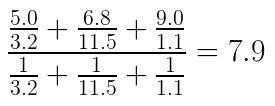

In [5]:
from IPython.display import Image
Image('E:\sources\T_KNN_R_image01.png')

In [6]:
# 분자는 영화(이웃)의 점수를 각각 X로부터 떨어진 거리로 나눈 값의 합, 그리고 분모는 1을 각자 X로부터 떨어진 거리로 나눈 값의 합이다.

# 이렇게 가중 평균을 사용하면 X의 점수를 더 잘 예측할 수 있을 거다.

In [7]:
# sklearn KNeighborsRegressor 사용법
# 파이썬으로 직접 이 알고리즘을 적용해보기 전에 scikit-learn 사용법을 간단히 익혀보자.

# KNeighborsRegressor(회귀)를 적용하는 코드는 당연히 KNeighborsClassifier(분류)와 매우 유사하다. \
# KNeighborsClassifier에 대해서는 아래 포스팅을 참고하면 된다.

In [8]:
# 아무튼 하나씩 살펴보자. 일단 라이브러리를 불러오고

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
# 회귀 모델을 생성한다. 이 때 n_neighbors, 즉 k를 정해줘야 한다. 그리고 위에서 설정한 가중 평균을 적용하기 위해 weights = "distance"를 넣어주었다. (이렇게 써주지 않으면 weight의 기본값은 단순한
# 평균을 사용하는 방법, “uniform”이 적용된다.)

In [11]:
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

In [12]:
# 그 다음 데이터를 .fit() 시켜준다. 학습 데이터는 여러 개의 차원으로 이루어진 배열(점들의 집합)이 될 거고, y 데이터는 레이블(각 점들의 분류 결과)가 된다. 이 예제에서는 0 아니면 1로 분류되는 거다.
 
# 그 다음 데이터를 .fit() 시켜준다. 학습 데이터는 여러 개의 차원으로 이루어진 배열이 될 거고, 레이블은 (분류가 아니라 회귀를 사용하는 것이라서 범주형 데이터가 아닌) 연속적인 데이터, 즉 수치가 들어오게 된다.

In [13]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [5.0, 6.8, 9.0]
regressor.fit(training_points, training_labels)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [14]:
# 아, 그리고 여기서 학습 데이터의 각 특성마다 스케일, 즉 단위가 다르다면 0과 1사이의 값으로 정규화를 시켜주는 게 필요하다. 더 자세히 알고 싶다면 아래 포스팅을 참고하자.

In [15]:
# 아무튼 이렇게 다 된 거다.

# 만약 새로운 값들을 분류하고 싶다면 .predict()를 사용하면 된다.

In [16]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
guesses = regressor.predict(unknown_points)

In [17]:
# sklearn KNeighborsRegressor 실전 예제
# 만약 movie_dataset에는 영화에 대한 3개의 특성이 담겨 있고, movie_ratings에 그 영화에 대한 별점이 담겨 있다고 하자. 그리고 그걸로 학습한 모델을 통해 아래와 같은 특성을 가진 새로운 영화 3건에 대해 별점을 예측해보자.

# [0.016, 0.300, 1.022]
# [0.0004092981, 0.283, 1.0112]
# [0.00687649, 0.235, 1.0112]
# # 그러면 이런 코드를 작성할 수 있겠다.

In [20]:
movie_dataset  = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
movie_ratings = [5.0, 6.8, 9.0]

In [22]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
regressor.fit(movie_dataset , movie_ratings)
print(regressor.predict([
  [0.016, 0.300, 1.022],
  [0.0004092981, 0.283, 1.0112],
  [0.00687649, 0.235, 1.0112]
]))

[7.44812457 7.43057323 7.40550667]


In [ ]:
# 임의의 자료는 직접 넣은 것임.